## Лабораторная работа №1 | Вариант 2

Выполнил: Бучкин Тимур Артемович М8О-301Б-22

### 1. Numpy

In [43]:
import numpy as np


1. Создайте матрицу размером 8х8 и заполните ее шахматным рисунком

In [44]:
slot = np.asarray([['W', 'B'], ['B', 'W']])
np.tile(slot, (4, 4))


array([['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W'],
       ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W'],
       ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W'],
       ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W']], dtype='<U1')

2. Каков результат выполнения следующих выражений?

```python
np.array(0) / np.array(0)
np.array(0) // np.array(0)
np.array([np.nan]).astype(int).astype(float)
```

В первом случае значение не определено(np.nan, типа бесконечность)
Во втором будет 0
В третьем после привидения к int получиться 4 байта из 1ц. Т.е. минимально возможный int, а потом он привидется к числу с плавающей точкой и таким же значением(array([-2.14748365e+09]))

Ну и т.к. все операции производятся над массивами, то и вышеописанные результаты будут лежать в массиве.

3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [45]:
slot = np.asarray([['W', 'B'], ['B', 'W']])
np.tile(slot, (4, 4))


array([['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W'],
       ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W'],
       ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W'],
       ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B'],
       ['B', 'W', 'B', 'W', 'B', 'W', 'B', 'W']], dtype='<U1')

4. Как округлить до целых массив чисел с плавающей точкой?

In [46]:
a = np.random.randn(4, 3) * 10
a, np.trunc(a)


(array([[  3.3122152 ,   9.82303927,   3.04792184],
        [ -3.19140273,  -0.68327189, -20.5092351 ],
        [ 12.08593899,  17.66571889,  -1.43949546],
        [ -4.70566383,   8.88284935, -14.44201831]]),
 array([[  3.,   9.,   3.],
        [ -3.,  -0., -20.],
        [ 12.,  17.,  -1.],
        [ -4.,   8., -14.]]))

5. Как найти общие значения между двумя массивами?

In [47]:
a = np.asarray([[1, 2, 4], [3, 4, 5]])
b = np.asarray([[5, 4, 3, 4, 1, 5]])

# Найдем общие значения в линеаризованном виде
a.ravel()[a.ravel() == b.ravel()]


array([5])

6. Как вычислить ((A+B)*(-A/2)) на месте (без копирования)?

In [48]:
A = np.random.randn(3, 3) * 5
B = np.random.randn(3, 3) * 5

# Сначала в к B прибавим A на месте, а потом умножим на (-А/2)

print(A, B, sep='\n')

B.__iadd__(A)
B.__imul__(-A/2)

B


[[-0.14561576 -7.84593046  1.21967806]
 [-3.91548835  0.54747599  0.33903913]
 [-3.80921487 -4.54802446 -7.98088002]]
[[-0.69619268  0.98679861  4.78980174]
 [ 3.69253412  5.09967858  2.42226197]
 [-2.93500871 -2.5183868   3.73794524]]


array([[ -0.06129029, -26.90813573,  -3.66481533],
       [ -0.43648734,  -1.54584078,  -0.46809455],
       [-12.84509837, -16.06910562, -16.93117669]])

7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [49]:
# Я так понимаю, что надо найти расстояния между каждой парой точек

points = np.random.randn(100, 2)
# points = np.asarray([[-1, -2], [3, 4], [5, 6]]) # Для отладки

points_rows = np.tile(points, points.shape[0]).reshape(
    (points.shape[0], points.shape[0], 2))
points_cols = points_rows.transpose((1, 0, 2))

diff = points_rows - points_cols
distances = np.sqrt(diff[:, :, 0] ** 2 + diff[:, :, 1] ** 2)

# distances[i][j] -- расстояние между точками points[i] и points[j]
distances


array([[0.        , 3.14432678, 3.73397373, ..., 2.00142074, 1.83237585,
        2.8208215 ],
       [3.14432678, 0.        , 3.10926361, ..., 1.1436967 , 2.42723952,
        2.0948048 ],
       [3.73397373, 3.10926361, 0.        , ..., 3.02280479, 1.90517886,
        1.1458058 ],
       ...,
       [2.00142074, 1.1436967 , 3.02280479, ..., 0.        , 1.66715988,
        1.87720911],
       [1.83237585, 2.42723952, 1.90517886, ..., 1.66715988, 0.        ,
        1.06034996],
       [2.8208215 , 2.0948048 , 1.1458058 , ..., 1.87720911, 1.06034996,
        0.        ]])

8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [50]:
n, m = 2, 3
a = np.random.randn(2, 3).astype(np.float32)

b = a.view(np.int32)
print(a.dtype)
print(b.dtype)

# Проверим, что преобразование было без копирования
print(a[0][0])
b[0][0] = 0
print(a[0][0])


float32
int32
-2.139568
0.0


9. Создайте структурированный массив, представляющий позицию (x, y) и цвет (r, g, b).

In [51]:
# Можно хранить эту пару вместе ([x, y, r, g, b])
N = 10 # Количество записей

items = np.random.randn(N, 5) # Заполнил случайными величинами, потому что больше не из чего

def pos(item):
  return item[:2]

def color(item):
  return item[2:]

print(items)
pos(items[3]), color(items[3])

[[ 1.62289253  0.16347137  0.21726047  1.03468284 -0.49572632]
 [-0.66025641  1.8463697  -0.13238042  0.43526363  0.88639105]
 [-0.98486467 -1.13105767 -0.52282218 -0.9784413  -0.00797761]
 [ 0.07085503 -1.19372648  0.7672528  -0.02397392 -1.00200009]
 [ 0.42566838  0.15413606 -0.07829689 -0.74989526 -0.82149583]
 [ 0.7364291   0.12120891  0.27469821 -0.05479438 -0.24790822]
 [-1.62681825 -0.59720075  2.11109794  0.18611432 -0.67329328]
 [-0.76432099  1.27098808 -0.07137721  1.55754431  1.12329411]
 [-0.86728708  1.1034775   0.1493576   0.82343645  0.05240553]
 [ 0.23487093  0.21068158 -1.58331084  0.09845558 -0.45417099]]


(array([ 0.07085503, -1.19372648]),
 array([ 0.7672528 , -0.02397392, -1.00200009]))

10. Какой эквивалент enumerate для numpy массивов?

In [52]:
# np.ndenumerate

a = np.random.randn(3, 2)

for i, item in np.ndenumerate(a):
  print(i, item)


(0, 0) -1.9508825975719104
(0, 1) 0.9421138110923999
(1, 0) -1.1984193917169172
(1, 1) -1.426260121414932
(2, 0) -0.6907479783160054
(2, 1) -0.8134329744804106


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Данные о преступлениях, совершенных женщинами в Индии, с демографическими подробностями.

Файл: `CrimesOnWomenData.csv`

```
State - название штата/региона
Year - год записи
Rape - случаи изнасилования
K&A - случаи похищения 
DD - смерти из-за приданого
AoW - нападение на женщин
AoM - нападение на женскую скромность(modestity)
DV - бытовое насилие
WT - торговля женщинами
```

In [53]:
import pandas as pd


In [54]:
# Load dataset here
df = pd.read_csv('CrimesOnWomenData.csv')
df.head(5)

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


1. За какие года представлен набор данных?

In [55]:
year_min, year_max = df["Year"].min(), df["Year"].max()
year_min, year_max

(2001, 2021)

2. Выявите район с самым высоким количеством убийств женщин

In [56]:
# Т.к. именно убиства упоминаются только в колонке DD -- буду искать по ней

df[df["DD"] == df["DD"].max()]["State"]

582    Uttar Pradesh
Name: State, dtype: object

3. Какое среднее число изнасилований женщин в индии наблюдалось в указанные года?

In [57]:
np.sum(df["Rape"]) / (year_max - year_min)

26785.1

4. Выявите район с минимальным числом похищений за период 2001-2003 года

In [58]:
rows = df[(df["Year"] >= 2001) & (df["Year"] <= 2003)]
rows[rows["K&A"] == rows["K&A"].min()]["State"]

32     LAKSHADWEEP
66     LAKSHADWEEP
90          SIKKIM
100    LAKSHADWEEP
Name: State, dtype: object

5. Перечислите районы в которых наблюдались наиболее частые случае домашнего насилия за период с 2005 по 2012 года

In [59]:
rows = df[(df["Year"] >= 2005) & (df["Year"] <= 2012)]
rows[rows["DV"] == rows["DV"].max()]["State"]

404    West Bengal
Name: State, dtype: object

6. Выведите названия районов в порядке не возрастания случаев торговли женщинами за 2020 год

In [60]:
rows = df[df["Year"] == 2020]

rows.sort_values("WT").iloc[: : -1]

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
686,686,Sikkim,2020,389,633,40,892,31,689,231
674,674,Jharkhand,2020,504,923,176,4751,70,2055,159
677,677,Madhya Pradesh,2020,2061,5254,197,9965,969,6729,85
684,684,Punjab,2020,5310,4739,479,8661,85,13765,67
691,691,Uttarakhand,2020,1128,7740,522,2488,446,19962,52
664,664,Andhra Pradesh,2020,1095,534,111,4886,2342,6546,48
670,670,Gujarat,2020,486,597,6,846,17,3345,47
667,667,Bihar,2020,806,6671,1046,584,6,1935,30
671,671,Haryana,2020,1373,2423,251,2339,183,4119,28
689,689,Tripura,2020,2769,9109,2274,9864,28,14454,25


Перейдем к следующему набору данных.

Файл: `CustomerPurchasingBehaviors.csv`

Этот набор данных содержит информацию о профилях клиентов и их покупательском поведении. Данные содержат столбцы, содержащие идентификатор пользователя, возраст, годовой доход, сумму покупки, показатель лояльности (в разбивке по классам), регион и частоту покупок. Он предназначен для анализа тенденций сегментации клиентов и лояльности и может быть использован для различных задач машинного обучения и анализа данных, связанных с поведением клиентов и исследованиями рынка.

```
user_id - ID клиента
age - Возраст
annual_income - Годовой доход клиента (в долларах США).
purchase_amount - Общая сумма покупок, совершенных клиентом (в долларах США).
loyalty_score - Показатель лояльности клиента (значение от 0 до 100).
region - Регион, в котором проживает клиент (Север, Юг, Восток, Запад).
purchase_frequency - Частота покупок клиентов (количество раз в год).
```

loyalty_score имеет значения от 0 до 10

In [61]:
# Load dataset here
df = pd.read_csv("CustomerPurchasingBehaviors.csv")

print(df["loyalty_score"].min(), df["loyalty_score"].max())
df.head(5)

3.0 9.5


,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


8. Какой средний годовой доход у клиентов с уровнем лояльности больше 50 живущих на севере

In [62]:
df[(df["loyalty_score"] > 5) & (df["region"] == "North")]["annual_income"].mean()

60146.34146341463

9. Выведите 25 и 75 перцентили уровня лоальности клиентов живущих на западе с частотой покупок более 20 раз в год

In [63]:
df[(df["region"] == "West") & (df["purchase_frequency"] > 20)]["loyalty_score"].quantile(q=[0.25, 0.75])

0.25    8.5
0.75    9.2
Name: loyalty_score, dtype: float64

10. Отличается ли медианный возраст клиентов с уровнем лояльности более 70 и менее 10 для жителей Востока и Севера.

In [64]:
first = df[(df["loyalty_score"] > 7) & (df["region"] == "East")]
second = df[(df["loyalty_score"] < 1) & (df["region"] == "North")]
first_median, second_median = first["age"].quantile(0.5), second["age"].quantile(0.5)

print(first_median, second_median) # В датасете вроде бы нет никого с уровнем лояльности меньше 10
first_median != second_median

40.0 nan


True

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте диаграмму которая отражает средний уровень лояльности во всех регионах

           user_id        age  annual_income  purchase_amount  loyalty_score   
region                                                                         
East     16.833333  31.666667   49000.000000       320.000000       5.400000  \
North   122.141026  34.358974   53038.461538       358.589744       5.865385   
South   121.649351  38.000000   55766.233766       416.883117       6.725974   
West    122.675325  44.272727   64129.870130       510.519481       7.911688   

        purchase_frequency  
region                      
East             16.666667  
North            17.653846  
South            19.467532  
West             22.545455  


<Axes: xlabel='region', ylabel='loyalty_score'>

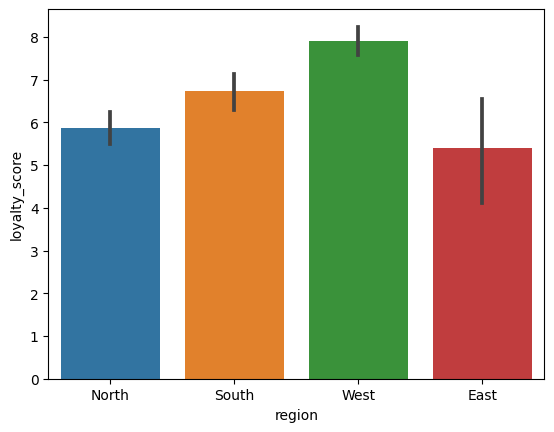

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('CrimesOnWomenData.csv')
df2 = pd.read_csv("CustomerPurchasingBehaviors.csv")

mean = df2.groupby("region").mean()
print(mean)
sns.barplot(df2, y="loyalty_score", x = "region")

2. Постройте гистограмму распределения зарплат клиентов на Севере.

<Axes: xlabel='annual_income', ylabel='Count'>

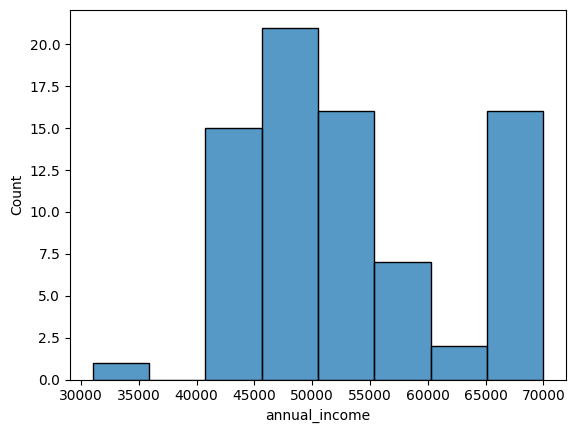

In [66]:
fees = df2[df2["region"] == "North"]

sns.histplot(fees, x="annual_income")

3. Сравните уровни зарплат людей на севере и юге.

<Axes: xlabel='annual_income', ylabel='Count'>

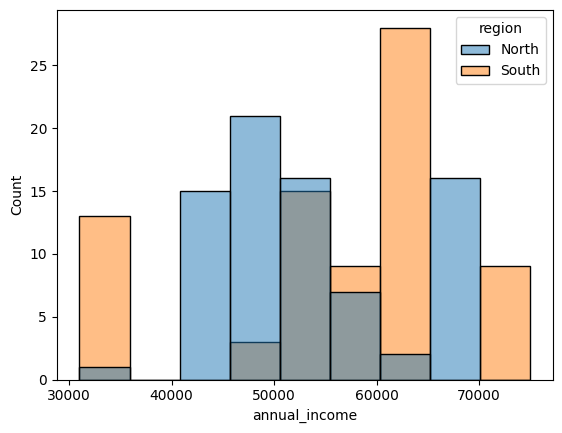

In [67]:
fees = df2[(df2["region"] == "North") | (df2["region"] == "South")]

sns.histplot(fees, x="annual_income", hue="region")

4. Постройте box plot отображающий распределение уровня лояльности для людей до 20 лет, от 20 до 40, от 40 до 60 и старше 60 лет

<Axes: xlabel='age_class', ylabel='loyalty_score'>

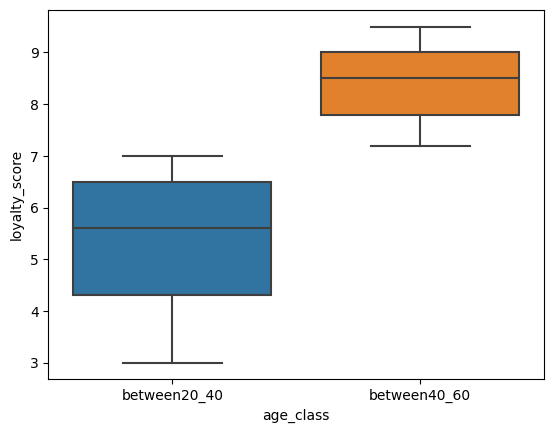

In [68]:
df2["age_class"] = np.where(df2["age"] < 20, "below20",
  np.where((df2["age"] >= 20) & (df2["age"] < 40), "between20_40", 
  np.where((df2["age"] >= 40) & (df2["age"] < 60), "between40_60","higher60")))

sns.boxplot(df2, x="age_class", y = "loyalty_score")


5. Визуализируйте зависимость частоты покупок от заработка

<Axes: xlabel='purchase_frequency', ylabel='annual_income'>

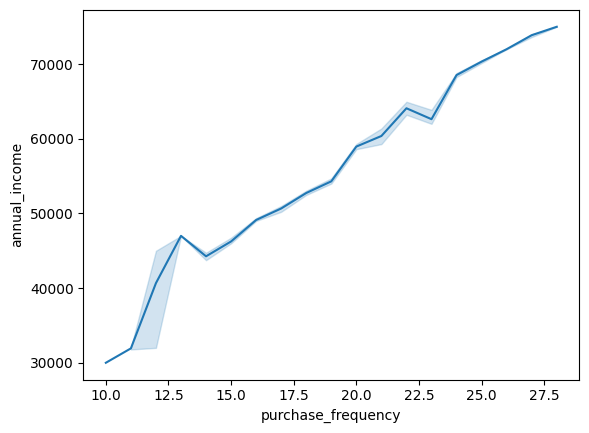

In [69]:
sns.lineplot(df2, x="purchase_frequency", y="annual_income")

6. Визуализируйте как зависит сумма покупок от зарплаты клиента

<Axes: xlabel='purchase_amount', ylabel='annual_income'>

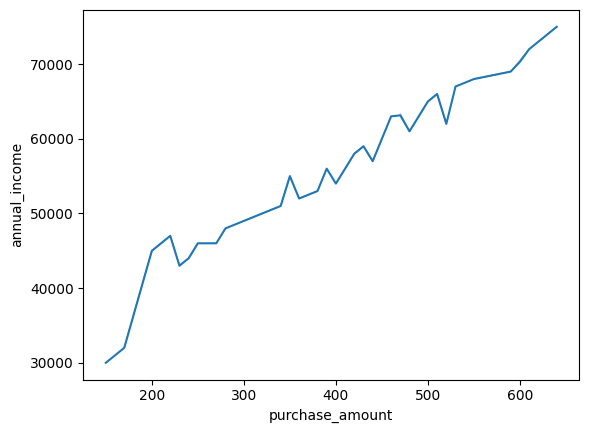

In [70]:
sns.lineplot(df2, x="purchase_amount", y="annual_income")

7. Придумайте как визуализировать зависимость между частотой покупок, суммой покупок и скором лояльности *

\* Задание на доп. балл

<Axes: xlabel='purchase_frequency', ylabel='purchase_amount'>

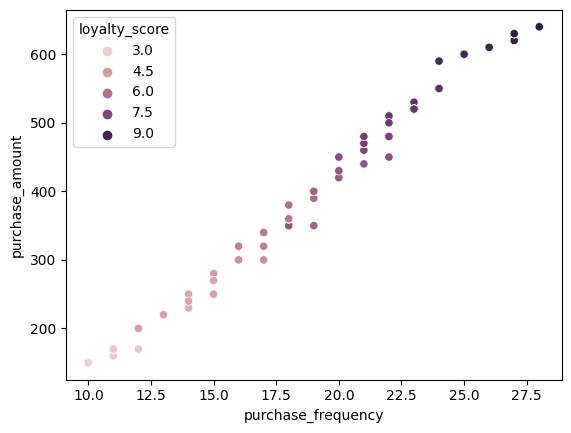

In [71]:
sns.scatterplot(df2, x="purchase_frequency", y="purchase_amount", hue="loyalty_score")